# Left, Right, Gender

## Supplemental Material -- Behavior

### Library Imports

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms, pyplot
import os
import json
import ast
import matplotlib.cm as cm
from matplotlib.patches import Rectangle, Circle
from matplotlib.patches import Patch
from matplotlib.legend import Legend
from matplotlib.lines import Line2D
from scipy.stats import kurtosis, skew
pd.set_option('display.max_rows', 500)
from datetime import datetime
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator
from scipy.stats import f_oneway

### Constants

In [2]:
experiment_modes = ["CTRL", "SUM", "RT", "RTSUM"] # AYS == CTRL
colors = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4']
hatches = ["\\\\", "o", "+", "*"]
meancolor = '#3498db'
mediancolor = 'red'

### Re-used methods

In [3]:
def custom_tick_boxplot(df, filename, columns, by, no_of_groups=4):

    meanpointprops = dict(marker='s', markeredgecolor='black', markerfacecolor=meancolor, markersize=8)
    medianlineprops = dict(linestyle='-', linewidth=3, color=mediancolor)
    boxprops = dict(linestyle='-', linewidth=1, color='black')
    whiskerprops = dict(linestyle='-', linewidth=1, color='black')
    flierprops = dict(linestyle='-', linewidth=1, color='black')
    maxvalue = df[columns[0]].max()
    minvalue=0
    bp_dict = df.boxplot(by=by, 
                          whiskerprops=whiskerprops, 
                          boxprops=boxprops, 
                          vert=False, 
                          column=columns, 
                          meanprops=meanpointprops, 
                          showmeans=True, 
                          medianprops=medianlineprops,
                          layout=(8,1),
                          figsize=(5, 20),
                          return_type='both',
                          patch_artist = True,
                          widths=[0.7]*no_of_groups
                         )

    for row_key, (ax,row) in bp_dict.iteritems():
        ax.grid(alpha=0.4, b=True)
        ax_title = ax.get_title()        

        if int(maxvalue/4) > 0:
            ax.set_xticks(np.arange(minvalue, maxvalue*1.1, int(maxvalue/4)))
        else:
            ax.set_xticks(np.arange(minvalue, maxvalue*1.1, maxvalue))

        ax.set_ylabel(ax_title, rotation=0, labelpad=15, fontsize=14, horizontalalignment='right', verticalalignment='center')
        ax.set_xlabel('', labelpad=10, fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12, length=0, pad=10)
        ax.set_title('')

        for j,s in enumerate(ax.spines):
            ax.spines[s].set_visible(False)

        for i,box in enumerate(row['boxes']):
            box.set_facecolor(colors[i])
            box.set_hatch(hatches[i])
            
            
    stats_list = list()
    for col in columns:        
        mean_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).mean().round(2).reset_index().values.tolist():
            mean_obj = dict()
            mean_obj["experiment_mode"] = item[0]
            mean_obj["mean"] = item[1]
            mean_list.append(mean_obj)
            
        median_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).median().round(2).reset_index().values.tolist():
            median_obj = dict()
            median_obj["experiment_mode"] = item[0]
            median_obj["median"] = item[1]
            median_list.append(median_obj)

        std_list = list()
        for item in df[[col,by[0]]].groupby(by[0]).std().round(2).reset_index().values.tolist():
            std_obj = dict()
            std_obj["experiment_mode"] = item[0]
            std_obj["std"] = item[1]
            std_list.append(std_obj)
            
        for index, obj in enumerate(std_list):
            stats_dict = dict()
            stats_dict["column"] = col
            stats_dict["experiment_mode"] = obj["experiment_mode"]
            stats_dict["mean"] = mean_list[index]["mean"]
            stats_dict["median"] = median_list[index]["median"]
            stats_dict["std"] = std_list[index]["std"]
            stats_list.append(stats_dict)

    df_stats = pd.DataFrame(stats_list)
    print(df_stats)
    
    df1 = df.copy()
    vals = df.groupby(by[0])[columns[0]].apply(list).reset_index(name='new')["new"].values
    
    f_stat, p_val = f_oneway(*vals)
    print("P Value: ", round(p_val, 4))

    plt.title("")
    plt.suptitle("")
    plt.subplots_adjust(wspace=None, hspace=0.5)
    plt.savefig(filename, bbox_inches = "tight")
    plt.show()

# Politics

## Summary plots - Attribute

#### Create a combined DF with both Control and Awareness

In [4]:
df_attribute_stats = pd.DataFrame()
for experiment_mode in experiment_modes:
    inputfile_attribute_stats = f"{experiment_mode}/all_{experiment_mode}_politics_attr_stats.csv"
    _df = pd.read_csv(inputfile_attribute_stats, sep=",")
    _df["experiment_mode"] = experiment_mode
    df_attribute_stats = df_attribute_stats.append(_df)
    
df_attribute_stats["total_attribute_interactions"] = df_attribute_stats["count_encode_changed"] + df_attribute_stats["count_filter_changed"] + df_attribute_stats["count_dist_card_click"]

### Which Condition clicked more on the Distribution Panel Cards?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                  column experiment_mode  mean  median   std
0  count_dist_card_click              RT  0.23       0  0.53
1  count_dist_card_click           RTSUM  0.15       0  0.49
P Value:  0.2368


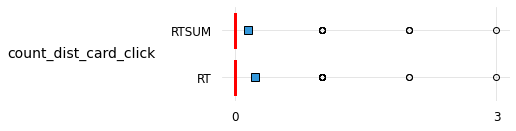

In [5]:
df_attribute_stats_shortened = df_attribute_stats[df_attribute_stats["experiment_mode"].isin(["RT", "RTSUM"])]
columns = ["count_dist_card_click"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/count_distribution_card_changed.pdf"
custom_tick_boxplot(df=df_attribute_stats_shortened, 
                      by=by,
                      columns=columns, 
                      filename=filename,
                      no_of_groups=2)

### Which Condition _changed_ more attribute Filters?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                 column experiment_mode  mean  median   std
0  count_filter_changed            CTRL  0.65       0  1.25
1  count_filter_changed              RT  0.96       0  1.75
2  count_filter_changed           RTSUM  1.12       0  2.07
3  count_filter_changed             SUM  0.95       0  1.85
P Value:  0.2334


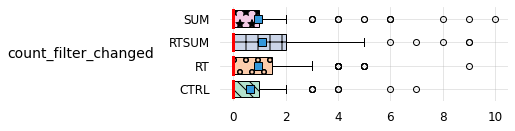

In [6]:
columns = ["count_filter_changed"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/count_filter_changed.pdf"
custom_tick_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Condition _changed_ more attributes as  Encodings?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                 column experiment_mode  mean  median   std
0  count_encode_changed            CTRL  0.52       0  0.75
1  count_encode_changed              RT  0.64       0  1.05
2  count_encode_changed           RTSUM  0.81       0  1.11
3  count_encode_changed             SUM  0.56       0  0.84
P Value:  0.1152


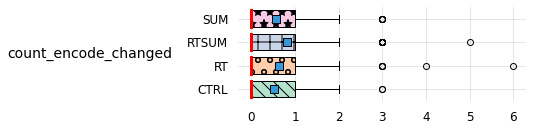

In [7]:
columns = ["count_encode_changed"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/count_encode_changed.pdf"
custom_tick_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Condition _changed_ more attributes as  Encodings + Filter + Distribution Card?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                         column experiment_mode  mean  median   std
0  total_attribute_interactions            CTRL  1.17       1  1.32
1  total_attribute_interactions              RT  1.83       1  1.94
2  total_attribute_interactions           RTSUM  2.07       1  2.32
3  total_attribute_interactions             SUM  1.52       1  2.07
P Value:  0.0037


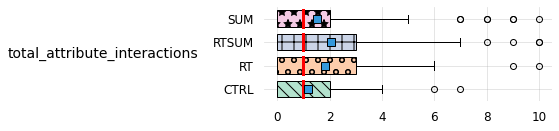

In [8]:
columns = ["total_attribute_interactions"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/total_attribute_interactions.pdf"
custom_tick_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Condition interacted with more _Unique_ Attributes overall?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                          column experiment_mode  mean  median   std
0  unique_attribute_interactions            CTRL  5.62     5.0  1.94
1  unique_attribute_interactions              RT  6.45     6.0  2.58
2  unique_attribute_interactions           RTSUM  6.08     6.0  2.19
3  unique_attribute_interactions             SUM  5.50     5.5  2.38
P Value:  0.7155


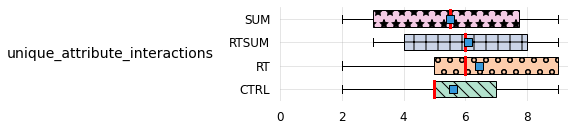

In [9]:
groupby_cols = ["experiment_mode", "pid"]
subset_cols = groupby_cols + ["attribute"]
df_unique_interacted_attributes = df_attribute_stats[df_attribute_stats["total_attribute_interactions"] > 0][subset_cols].groupby(groupby_cols).agg(unique_attribute_interactions=("attribute","count"))
df_unique_interacted_attributes.reset_index(inplace=True)

columns = ["unique_attribute_interactions"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/unique_attribute_interactions.pdf"
custom_tick_boxplot(df=df_unique_interacted_attributes, 
                      by=by,
                      columns=columns, 
                      filename=filename)

## Summary plots - DataPoints

In [10]:
df_datapoint_stats = pd.DataFrame()
for experiment_mode in experiment_modes:
    inputfile_datapoint_stats = f"{experiment_mode}/all_{experiment_mode}_politics_datapoint_stats.csv"
    _df = pd.read_csv(inputfile_datapoint_stats, sep=",")
    _df["experiment_mode"] = experiment_mode
    df_datapoint_stats = df_datapoint_stats.append(_df)
    
    
df_datapoint_stats["count_hovers"] = df_datapoint_stats["count_vis_hovers"] + df_datapoint_stats["count_list_hovers"]
df_datapoint_stats["count_click_add"] = df_datapoint_stats["count_vis_click_add"] + df_datapoint_stats["count_card_click_add"]
df_datapoint_stats["count_click_remove"] = df_datapoint_stats["count_list_click_remove"] + df_datapoint_stats["count_card_click_remove"]

In [11]:
df_datapoint_stats.columns

Index(['pid', 'id', 'count_vis_hovers', 'count_vis_click_add',
       'count_list_hovers', 'count_list_click_remove', 'count_card_click_add',
       'count_card_click_remove', 'experiment_mode', 'count_hovers',
       'count_click_add', 'count_click_remove'],
      dtype='object')

In [12]:
df_datapoint_stats_agg = df_datapoint_stats.groupby(["experiment_mode","pid"]).agg(
    count_hovers=("count_hovers", "sum"),
    count_click_add=("count_click_add", "sum"),
    count_click_remove=("count_click_remove", "sum"),
    count_vis_hovers=("count_vis_hovers","sum"),
    count_vis_click_add=("count_vis_click_add","sum"),
    count_list_hovers=("count_list_hovers","sum"),
    count_list_click_remove=("count_list_click_remove","sum"),
    count_card_click_add=("count_card_click_add", "sum"),
    count_card_click_remove=("count_card_click_remove", "sum")
)
df_datapoint_stats_agg.reset_index(inplace=True)
df_datapoint_stats_agg.head(1)

,experiment_mode,pid,count_hovers,count_click_add,count_click_remove,count_vis_hovers,count_vis_click_add,count_list_hovers,count_list_click_remove,count_card_click_add,count_card_click_remove
0,CTRL,0Odg8Ya9cQZM,21,10,0,21,10,0,0,0,0


### How many Total DataPoints Did the Participants Interact With?

In [13]:
groupby_cols = ["experiment_mode", "pid"]
subset_cols = groupby_cols + ["count_hovers"]
df_total_interacted_datapoints = df_datapoint_stats_agg[df_datapoint_stats_agg["count_hovers"] > 0][subset_cols].groupby(groupby_cols).agg(total_no_of_interacted_datapoints=("count_hovers","sum"))
df_total_interacted_datapoints.reset_index(inplace=True)
df_total_interacted_datapoints.head(1)

,experiment_mode,pid,total_no_of_interacted_datapoints
0,CTRL,0Odg8Ya9cQZM,21


### How many Unique DataPoints Did the Participants Interact With?

In [14]:
groupby_cols = ["experiment_mode", "pid"]
subset_cols = groupby_cols + ["id"]
df_unique_interacted_datapoints = df_datapoint_stats[df_datapoint_stats["count_hovers"] > 0][subset_cols].groupby(groupby_cols).agg(no_of_unique_interacted_datapoints=("id","count"))
df_unique_interacted_datapoints.reset_index(inplace=True)
df_unique_interacted_datapoints.head(1)

,experiment_mode,pid,no_of_unique_interacted_datapoints
0,CTRL,0Odg8Ya9cQZM,14


### How many Datapoints were Hovered across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


         column experiment_mode   mean  median    std
0  count_hovers            CTRL  31.46    25.0  21.44
1  count_hovers              RT  67.18    66.0  38.11
2  count_hovers           RTSUM  96.17    84.0  78.13
3  count_hovers             SUM  60.36    49.5  43.85
P Value:  0.0201


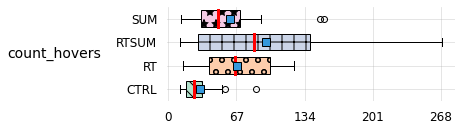

In [15]:
columns = ["count_hovers"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/count_hovers.pdf"
custom_tick_boxplot(df=df_datapoint_stats_agg, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### How many Datapoints were Clicked+Added across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


            column experiment_mode   mean  median   std
0  count_click_add            CTRL  12.77      11  4.40
1  count_click_add              RT  12.82      12  3.66
2  count_click_add           RTSUM  13.67      12  5.52
3  count_click_add             SUM  15.21      14  4.26
P Value:  0.474


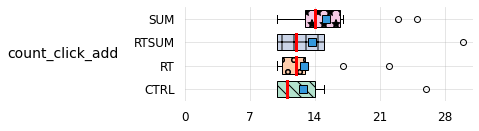

In [16]:
columns = ["count_click_add"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/count_click_add.pdf"
custom_tick_boxplot(df=df_datapoint_stats_agg, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### How many Datapoints were Clicked+Removed across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


               column experiment_mode  mean  median   std
0  count_click_remove            CTRL  1.85       1  3.24
1  count_click_remove              RT  1.55       1  2.07
2  count_click_remove           RTSUM  3.33       2  5.52
3  count_click_remove             SUM  3.57       2  4.03
P Value:  0.4776


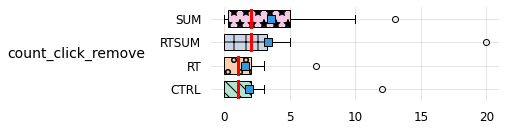

In [17]:
columns = ["count_click_remove"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/count_click_remove.pdf"
custom_tick_boxplot(df=df_datapoint_stats_agg, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### How many Datapoints were Clicked (Added + Removed) across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


        column experiment_mode   mean  median    std
0  count_click            CTRL  14.62    12.0   7.58
1  count_click              RT  14.36    13.0   4.74
2  count_click           RTSUM  17.00    14.0  11.01
3  count_click             SUM  18.79    16.5   8.17
P Value:  0.4794


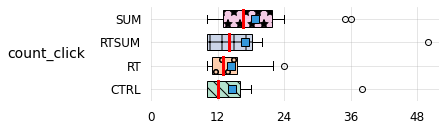

In [18]:
df_datapoint_stats_agg["count_click"] = df_datapoint_stats_agg["count_click_add"] + df_datapoint_stats_agg["count_click_remove"]
columns = ["count_click"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/count_click.pdf"
custom_tick_boxplot(df=df_datapoint_stats_agg, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### How many Unique Datapoints interacted across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                               column experiment_mode   mean  median    std
0  no_of_unique_interacted_datapoints            CTRL  16.62    13.0   7.23
1  no_of_unique_interacted_datapoints              RT  41.00    42.0  24.75
2  no_of_unique_interacted_datapoints           RTSUM  47.25    34.5  34.49
3  no_of_unique_interacted_datapoints             SUM  25.71    24.5  12.50
P Value:  0.0038


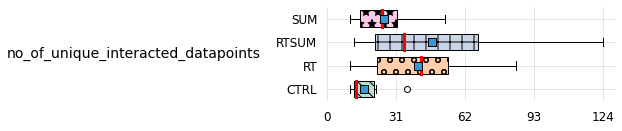

In [19]:
df_total_vs_unique_datapoints = df_unique_interacted_datapoints.merge(df_total_interacted_datapoints, on=["experiment_mode", "pid"], how="inner")
df_total_vs_unique_datapoints["ratio_total_unique_interacted_datapoints"] = df_total_vs_unique_datapoints["total_no_of_interacted_datapoints"] / df_total_vs_unique_datapoints["no_of_unique_interacted_datapoints"]
df_total_vs_unique_datapoints.head(1)

columns = ["no_of_unique_interacted_datapoints"]
by = ["experiment_mode"]
filename="charts/basic_eda/politics/unique-datapoints-across-condition.pdf"
custom_tick_boxplot(df=df_total_vs_unique_datapoints, 
                      by=by,
                      columns=columns, 
                      filename=filename)

# Movies

## Summary plots - Attribute

#### Create a combined DF with both Control and Awareness

In [20]:
df_attribute_stats = pd.DataFrame()
for experiment_mode in experiment_modes:
    inputfile_attribute_stats = f"{experiment_mode}/all_{experiment_mode}_movies_attr_stats.csv"
    _df = pd.read_csv(inputfile_attribute_stats, sep=",")
    _df["experiment_mode"] = experiment_mode
    df_attribute_stats = df_attribute_stats.append(_df)
    
df_attribute_stats["total_attribute_interactions"] = df_attribute_stats["count_encode_changed"] + df_attribute_stats["count_filter_changed"] + df_attribute_stats["count_dist_card_click"]

### Which Condition clicked more on the Distribution Panel Cards?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                  column experiment_mode  mean  median   std
0  count_dist_card_click              RT  0.35       0  0.73
1  count_dist_card_click           RTSUM  0.23       0  0.59
P Value:  0.1866


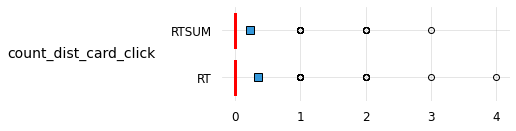

In [21]:
df_attribute_stats_shortened = df_attribute_stats[df_attribute_stats["experiment_mode"].isin(["RT", "RTSUM"])]
columns = ["count_dist_card_click"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/count_distribution_card_changed.pdf"
custom_tick_boxplot(df=df_attribute_stats_shortened, 
                      by=by,
                      columns=columns, 
                      filename=filename, no_of_groups=2)

### Which Condition _changed_ more attribute Filters?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                 column experiment_mode  mean  median   std
0  count_filter_changed            CTRL  1.14       0  2.34
1  count_filter_changed              RT  0.92       0  2.63
2  count_filter_changed           RTSUM  2.08       0  5.54
3  count_filter_changed             SUM  1.29       0  2.46
P Value:  0.0785


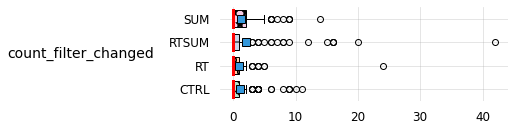

In [22]:
columns = ["count_filter_changed"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/count_filter_changed.pdf"
custom_tick_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Condition _changed_ more attributes as  Encodings?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                 column experiment_mode  mean  median   std
0  count_encode_changed            CTRL  0.74       0  1.41
1  count_encode_changed              RT  0.49       0  0.91
2  count_encode_changed           RTSUM  0.80       0  1.58
3  count_encode_changed             SUM  1.12       0  2.50
P Value:  0.0628


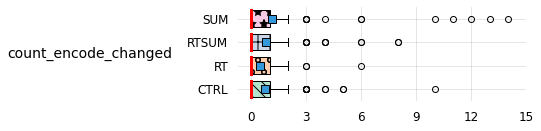

In [23]:
columns = ["count_encode_changed"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/count_encode_changed.pdf"
custom_tick_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Condition _changed_ more attributes as  Encodings + Filters + Distribution Card Clicks?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                         column experiment_mode  mean  median   std
0  total_attribute_interactions            CTRL  1.88       1  2.64
1  total_attribute_interactions              RT  1.77       1  2.86
2  total_attribute_interactions           RTSUM  3.11       1  5.63
3  total_attribute_interactions             SUM  2.41       1  3.23
P Value:  0.0366


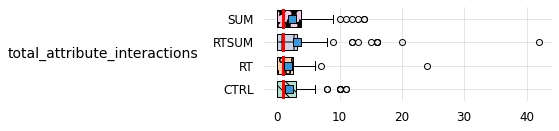

In [24]:
columns = ["total_attribute_interactions"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/total_attribute_interactions.pdf"
custom_tick_boxplot(df=df_attribute_stats, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### Which Condition interacted with more _Unique_ Attributes overall?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                          column experiment_mode  mean  median   std
0  unique_attribute_interactions            CTRL  5.08     5.0  2.22
1  unique_attribute_interactions              RT  5.55     5.0  2.62
2  unique_attribute_interactions           RTSUM  5.67     6.0  2.50
3  unique_attribute_interactions             SUM  5.57     5.5  1.95
P Value:  0.9182


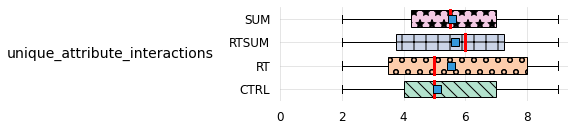

In [25]:
groupby_cols = ["experiment_mode", "pid"]
subset_cols = groupby_cols + ["attribute"]
df_unique_interacted_attributes = df_attribute_stats[df_attribute_stats["total_attribute_interactions"] > 0][subset_cols].groupby(groupby_cols).agg(unique_attribute_interactions=("attribute","count"))
df_unique_interacted_attributes.reset_index(inplace=True)

columns = ["unique_attribute_interactions"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/unique_attribute_interactions.pdf"
custom_tick_boxplot(df=df_unique_interacted_attributes, 
                      by=by,
                      columns=columns, 
                      filename=filename)

## Summary plots - DataPoints

In [26]:
df_datapoint_stats = pd.DataFrame()
for experiment_mode in experiment_modes:
    inputfile_datapoint_stats = f"{experiment_mode}/all_{experiment_mode}_movies_datapoint_stats.csv"
    _df = pd.read_csv(inputfile_datapoint_stats, sep=",")
    _df["experiment_mode"] = experiment_mode
    df_datapoint_stats = df_datapoint_stats.append(_df)
    
    
df_datapoint_stats["count_hovers"] = df_datapoint_stats["count_vis_hovers"] + df_datapoint_stats["count_list_hovers"]
df_datapoint_stats["count_click_add"] = df_datapoint_stats["count_vis_click_add"] + df_datapoint_stats["count_card_click_add"]
df_datapoint_stats["count_click_remove"] = df_datapoint_stats["count_list_click_remove"] + df_datapoint_stats["count_card_click_remove"]

In [27]:
df_datapoint_stats.columns

Index(['pid', 'id', 'count_vis_hovers', 'count_vis_click_add',
       'count_list_hovers', 'count_list_click_remove', 'count_card_click_add',
       'count_card_click_remove', 'experiment_mode', 'count_hovers',
       'count_click_add', 'count_click_remove'],
      dtype='object')

In [28]:
df_datapoint_stats_agg = df_datapoint_stats.groupby(["experiment_mode","pid"]).agg(
    count_hovers=("count_hovers", "sum"),
    count_click_add=("count_click_add", "sum"),
    count_click_remove=("count_click_remove", "sum"),
    count_vis_hovers=("count_vis_hovers","sum"),
    count_vis_click_add=("count_vis_click_add","sum"),
    count_list_hovers=("count_list_hovers","sum"),
    count_list_click_remove=("count_list_click_remove","sum"),
    count_card_click_add=("count_card_click_add", "sum"),
    count_card_click_remove=("count_card_click_remove", "sum")
)
df_datapoint_stats_agg.reset_index(inplace=True)
df_datapoint_stats_agg.head(1)

,experiment_mode,pid,count_hovers,count_click_add,count_click_remove,count_vis_hovers,count_vis_click_add,count_list_hovers,count_list_click_remove,count_card_click_add,count_card_click_remove
0,CTRL,0Odg8Ya9cQZM,12,10,0,12,10,0,0,0,0


### How many Total DataPoints Did the Participants Interact With?

In [29]:
groupby_cols = ["experiment_mode", "pid"]
subset_cols = groupby_cols + ["count_hovers"]
df_total_interacted_datapoints = df_datapoint_stats_agg[df_datapoint_stats_agg["count_hovers"] > 0][subset_cols].groupby(groupby_cols).agg(total_no_of_interacted_datapoints=("count_hovers","sum"))
df_total_interacted_datapoints.reset_index(inplace=True)
df_total_interacted_datapoints.head(1)

,experiment_mode,pid,total_no_of_interacted_datapoints
0,CTRL,0Odg8Ya9cQZM,12


### How many Unique DataPoints Did the Participants Interact With?

In [30]:
groupby_cols = ["experiment_mode", "pid"]
subset_cols = groupby_cols + ["id"]
df_unique_interacted_datapoints = df_datapoint_stats[df_datapoint_stats["count_hovers"] > 0][subset_cols].groupby(groupby_cols).agg(no_of_unique_interacted_datapoints=("id","count"))
df_unique_interacted_datapoints.reset_index(inplace=True)
df_unique_interacted_datapoints.head(1)

,experiment_mode,pid,no_of_unique_interacted_datapoints
0,CTRL,0Odg8Ya9cQZM,11


### How many Datapoints were Hovered across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


         column experiment_mode   mean  median    std
0  count_hovers            CTRL  23.62      22  10.50
1  count_hovers              RT  56.73      45  36.38
2  count_hovers           RTSUM  66.50      42  52.51
3  count_hovers             SUM  55.29      46  37.89
P Value:  0.0324


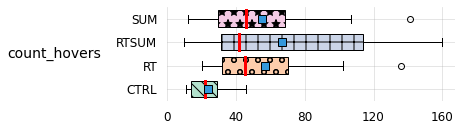

In [31]:
columns = ["count_hovers"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/count_hovers.pdf"
custom_tick_boxplot(df=df_datapoint_stats_agg, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### How many Datapoints were Clicked+Added across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


            column experiment_mode   mean  median    std
0  count_click_add            CTRL  11.62      10   2.43
1  count_click_add              RT  16.91      11  11.78
2  count_click_add           RTSUM  12.25      11   3.33
3  count_click_add             SUM  14.43      11   6.09
P Value:  0.2257


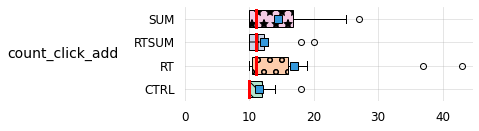

In [32]:
columns = ["count_click_add"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/count_click_add.pdf"
custom_tick_boxplot(df=df_datapoint_stats_agg, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### How many Datapoints were Clicked+Removed across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


               column experiment_mode  mean  median    std
0  count_click_remove            CTRL  1.31     0.0   1.84
1  count_click_remove              RT  5.36     1.0  10.16
2  count_click_remove           RTSUM  2.08     0.5   3.40
3  count_click_remove             SUM  2.86     0.5   4.69
P Value:  0.3553


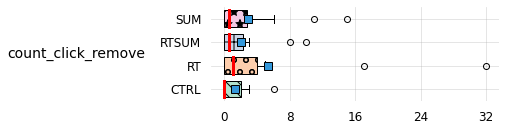

In [33]:
columns = ["count_click_remove"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/count_click_remove.pdf"
custom_tick_boxplot(df=df_datapoint_stats_agg, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### How many Datapoints were Clicked (Added + Removed) across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


        column experiment_mode   mean  median    std
0  count_click            CTRL  12.92    10.0   4.27
1  count_click              RT  22.27    12.0  21.79
2  count_click           RTSUM  14.33    11.5   6.72
3  count_click             SUM  17.29    12.0  10.49
P Value:  0.2762


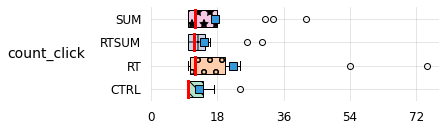

In [34]:
df_datapoint_stats_agg["count_click"] = df_datapoint_stats_agg["count_click_add"] + df_datapoint_stats_agg["count_click_remove"]
columns = ["count_click"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/count_click.pdf"
custom_tick_boxplot(df=df_datapoint_stats_agg, 
                      by=by,
                      columns=columns, 
                      filename=filename)

### How many Unique Datapoints interacted across Conditions?

/Users/curiosity/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


                               column experiment_mode   mean  median    std
0  no_of_unique_interacted_datapoints            CTRL  16.54    13.0   6.88
1  no_of_unique_interacted_datapoints              RT  32.73    38.0  14.01
2  no_of_unique_interacted_datapoints           RTSUM  43.67    30.0  37.82
3  no_of_unique_interacted_datapoints             SUM  22.79    18.5  14.49
P Value:  0.0153


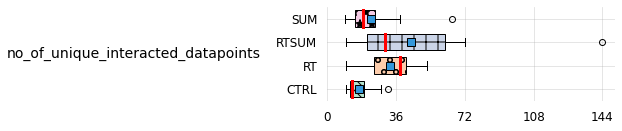

In [35]:
df_total_vs_unique_datapoints = df_unique_interacted_datapoints.merge(df_total_interacted_datapoints, on=["experiment_mode", "pid"], how="inner")
df_total_vs_unique_datapoints["ratio_total_unique_interacted_datapoints"] = df_total_vs_unique_datapoints["total_no_of_interacted_datapoints"] / df_total_vs_unique_datapoints["no_of_unique_interacted_datapoints"]
df_total_vs_unique_datapoints.head(1)

columns = ["no_of_unique_interacted_datapoints"]
by = ["experiment_mode"]
filename="charts/basic_eda/movies/unique-datapoints-across-condition.pdf"
custom_tick_boxplot(df=df_total_vs_unique_datapoints, 
                      by=by,
                      columns=columns, 
                      filename=filename)